# **Pertanyaan:**
### 1. Bagaimana distribusi mahasiswa yang graduate dan dropout?
### 2. Apa marital status yang memiliki peluang lebih banyak untuk lulus?
### 3. Apakah mahasiswa yang menggunakan beasiswa memiliki tingkat kelulusan yang lebih tinggi?
### 4. Apakah umur berpengaruh terhadap tingkat kelulusan mahasiswa?
### 5. Apakah GDP berpengaruh terhadap tingkat kelulusan mahasiswa?
### 6. Bagaimana pengaruh jumlah SKS di semester 1 terhadap tingkat kelulusan mahasiswa?
### 7. Bagaimana pengaruh jumlah SKS di semester 2 terhadap tingkat kelulusan mahasiswa?
### 8. Bagaimana persebaran IP mahasiswa di semester 1?
### 9. Bagaimana pengaruh IP mahasiswa di semester 1 terhadap tingkat kelulusan mahasiswa?
### 10. Bagaimana persebaran IP mahasiswa di semester 2?
### 11. Bagaimana pengaruh IP mahasiswa di semester 2 terhadap tingkat kelulusan mahasiswa?

In [9]:
# Import Package yang dibutuhkan
import numpy as np 
import pandas as pd 
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
# Menampilkan data
df = pd.read_csv('data.csv', sep=';')
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [3]:
# Ukuran dataset
df.shape

(4424, 37)

In [4]:
# Menampilkan nama-nama kolom pada dataset ini
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [5]:
# Menampilkan jenis tipe data pada setiap kolom
df.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance\t                        int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

In [6]:
df.drop(df[df['Target'] == 'Enrolled'].index, inplace = True)

In [7]:
df['Target'].value_counts()

Graduate    2209
Dropout     1421
Name: Target, dtype: int64

## **Bagaimana distribusi mahasiswa yang graduate dan dropout?**

<function matplotlib.pyplot.show(close=None, block=None)>

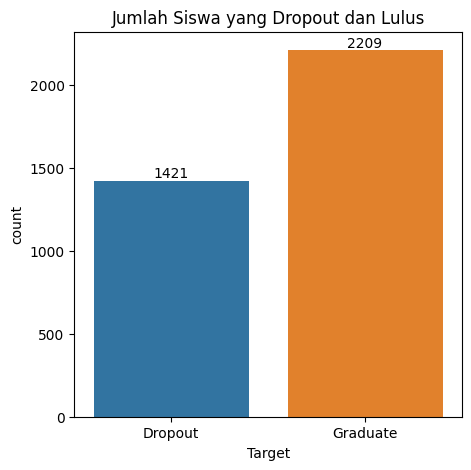

In [8]:
# Mengecek jumlah siswa yang dropout dan lulus 
plt.figure(figsize = (5,5))
ax = sns.countplot(data = df, x = 'Target')

# Untuk menampilkan nilai detail di atas bar
for i in ax.containers:
    ax.bar_label(i,)

plt.title('Jumlah Siswa yang Dropout dan Lulus')
plt.show

Tampak bahwa jumlah siswa yang lulus jauh lebih banyak daripada jumlah siswa yang dropout

## **Apa marital status yang memiliki peluang lebih banyak untuk lulus?**

In [17]:
fig = px.histogram(df, x='Marital status', color='Target', title="<b> Marital Status and Target", barmode='group', labels={'Marital status':'Marital Status', 'count':'Count', 'Target':''}, template='plotly_dark', text_auto=True)

fig.update_layout(font=dict(size=17, family="Franklin Gothic"))

fig.show()

## **Apakah mahasiswa yang menggunakan beasiswa memiliki tingkat kelulusan yang lebih tinggi?**

In [21]:
fig = px.histogram(df, x='Scholarship holder', color='Target', title="<b> Scholarship Stakeholder and Target", barmode='group', labels={'Scholarship holder':'Scholarship Holder', 'count':'Count', 'Target':''}, template='plotly_dark', text_auto=True)

fig.update_layout(font=dict(size=17, family="Franklin Gothic"), width=700, height=500)

fig.show()

## **Apakah umur berpengaruh terhadap tingkat kelulusan mahasiswa?**

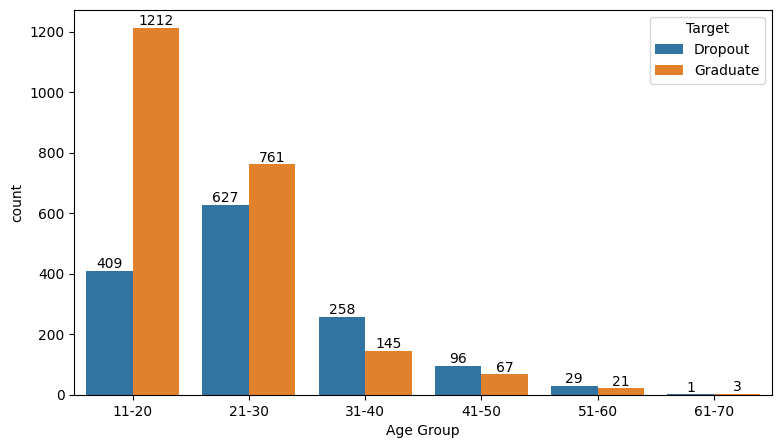

In [43]:
# Create bins for the 'Age at enrollment' column
bins = [10, 20, 30, 40, 50, 60, 70]
labels = ['11-20', '21-30', '31-40', '41-50', '51-60', '61-70']
df['Age Group'] = pd.cut(df['Age at enrollment'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(9, 5))
ax = sns.countplot(data=df, x='Age Group', hue='Target')

# Add count annotations
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()

## **Apakah GDP berpengaruh terhadap tingkat kelulusan mahasiswa?**

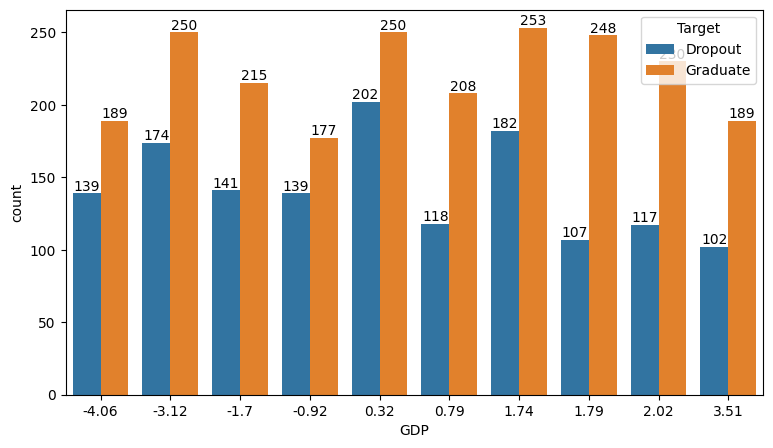

In [34]:
plt.figure(figsize=(9, 5))
ax = sns.countplot(data=df, x='GDP', hue='Target')

# Add count annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()

## **Bagaimana pengaruh jumlah SKS di semester 1 terhadap tingkat kelulusan mahasiswa?**

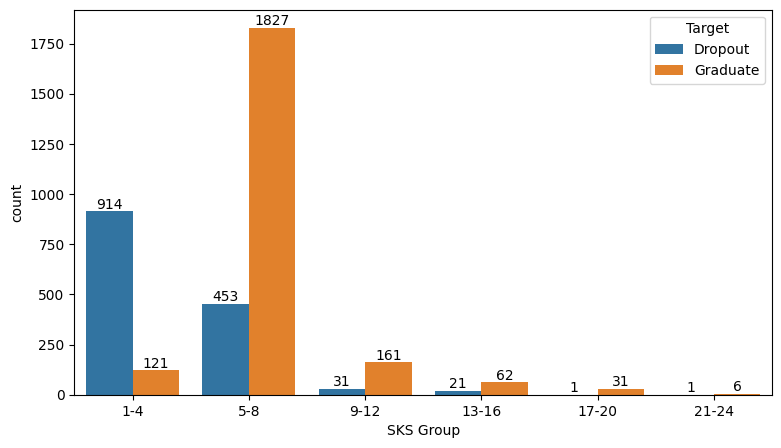

In [49]:
# Create bins for the 'Age at enrollment' column
bins = [0, 4, 8, 12, 16, 20, 24]
labels = ['1-4', '5-8', '9-12', '13-16', '17-20', '21-24']
df['SKS Group'] = pd.cut(df['Curricular units 1st sem (approved)'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(9, 5))
ax = sns.countplot(data=df, x='SKS Group', hue='Target')

# Add count annotations
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()

## **Bagaimana pengaruh jumlah SKS di semester 2 terhadap tingkat kelulusan mahasiswa?**

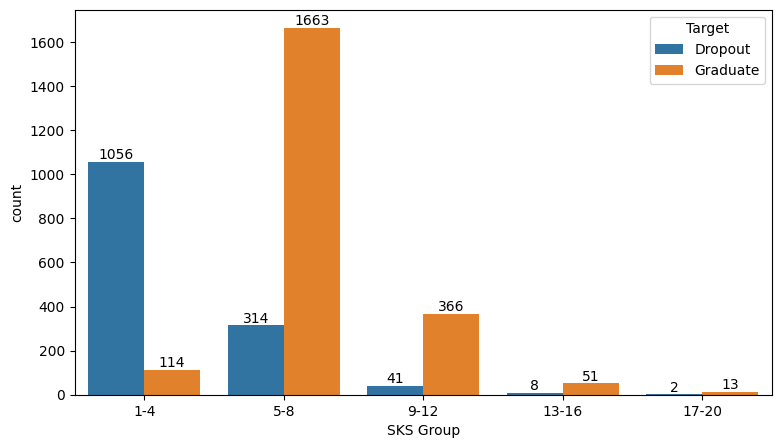

In [52]:
# Create bins for the 'Age at enrollment' column
bins = [0, 4, 8, 12, 16, 20]
labels = ['1-4', '5-8', '9-12', '13-16', '17-20']
df['SKS Group'] = pd.cut(df['Curricular units 2nd sem (approved)'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(9, 5))
ax = sns.countplot(data=df, x='SKS Group', hue='Target')

# Add count annotations
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()

## **Bagaimana persebaran IP mahasiswa di semester 1?**

In [59]:
fig = px.histogram(df, x='Curricular units 1st sem (grade)', template='plotly_dark', marginal='rug', title="<b> 1st Semester Grade Distribution")
fig.update_layout(
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

## **Bagaimana pengaruh IP mahasiswa di semester 1 terhadap tingkat kelulusan mahasiswa?**

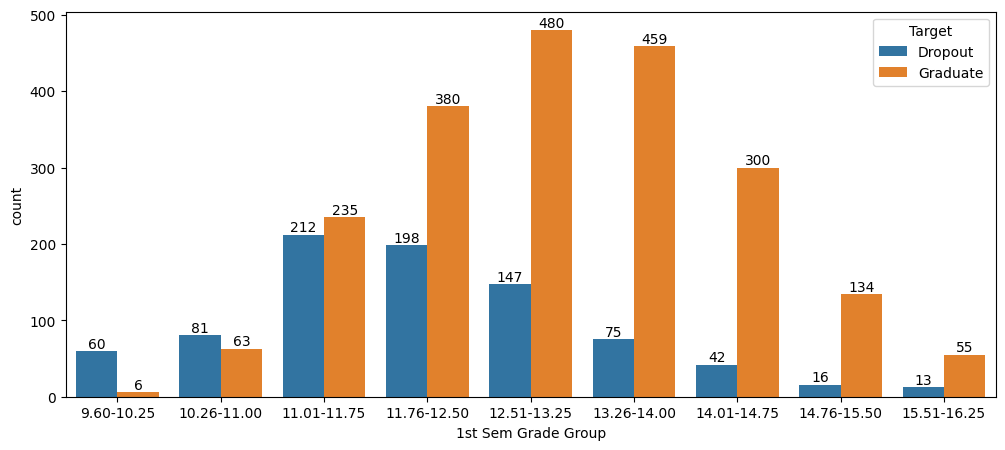

In [70]:
# Create bins for the 'Age at enrollment' column
bins = [9.5, 10.25, 11, 11.75, 12.5, 13.25, 14, 14.75, 15.5, 16.25]
labels = ['9.60-10.25', '10.26-11.00', '11.01-11.75', '11.76-12.50', '12.51-13.25', '13.26-14.00', '14.01-14.75', '14.76-15.50', '15.51-16.25']
df['1st Sem Grade Group'] = pd.cut(df['Curricular units 1st sem (grade)'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(12, 5))
ax = sns.countplot(data=df, x='1st Sem Grade Group', hue='Target')

# Add count annotations
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()

## **Bagaimana persebaran IP mahasiswa di semester 2?**

In [60]:
fig = px.histogram(df, x='Curricular units 2nd sem (grade)', template='plotly_dark', marginal='rug', title="<b> 2nd Semester Grade Distribution")
fig.update_layout(
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

## **Bagaimana pengaruh IP mahasiswa di semester 2 terhadap tingkat kelulusan mahasiswa?**

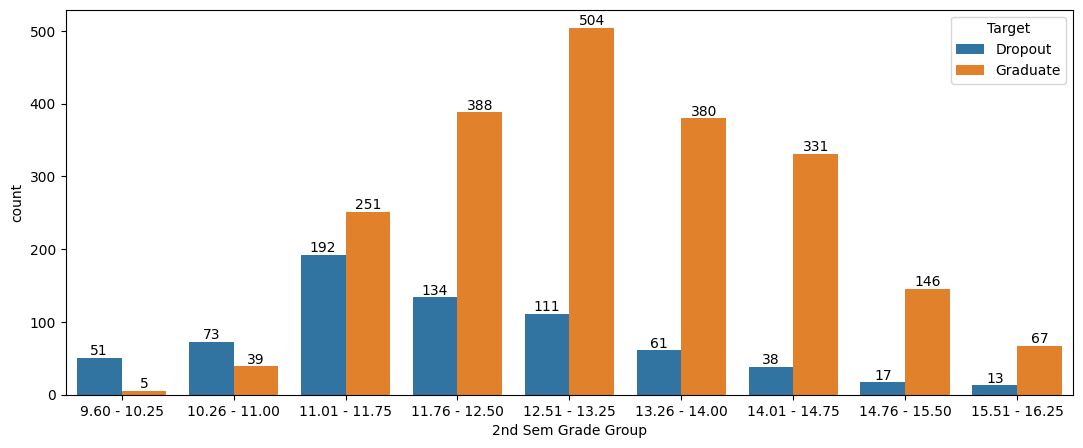

In [73]:
# Create bins for the 'Age at enrollment' column
bins = [9.5, 10.25, 11, 11.75, 12.5, 13.25, 14, 14.75, 15.5, 16.25]
labels = ['9.60 - 10.25', '10.26 - 11.00', '11.01 - 11.75', '11.76 - 12.50', '12.51 - 13.25', '13.26 - 14.00', '14.01 - 14.75', '14.76 - 15.50', '15.51 - 16.25']
df['2nd Sem Grade Group'] = pd.cut(df['Curricular units 2nd sem (grade)'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(13, 5))
ax = sns.countplot(data=df, x='2nd Sem Grade Group', hue='Target')

# Add count annotations
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()